### Display Raw Data

In [1]:
%load_ext autoreload
%autoreload 2

In [1]:
import glob

import matplotlib.pyplot as plt
import mne

import Modularized_Data_Processing as mdp

filepath = r"C:\Users\Owner\OneDrive - Regis University\laryngeal_bci\data\fifs\BCIproject_trial-N-1.2-11-2021_raw.fif.gz"

PATH1 = r"C:\Users\Owner\OneDrive - Regis University\laryngeal_bci\data\fifs\\"
PATH2 = r"C:\Users\words\OneDrive - Regis University\laryngeal_bci\data\fifs\\"
PATH = PATH1
FILENAME1 = PATH + "BCIproject_trial-S5_raw.fif.gz"
FILENAME2 = PATH + "BCIproject_trial-S3_raw.fif.gz"
FILENAME3 = PATH + "BCIproject_trial-1.2-11-2021_raw.fif.gz"
S_FILES = [f for f in glob.glob(PATH + '*S*raw.fif.gz')]
N_FILES = [f for f in glob.glob(PATH + '*N*raw.fif.gz')]
NEW_N_FILES = [f for f in glob.glob(PATH + '*N-*raw.fif.gz')]
FILENAMES = NEW_N_FILES

#Load data
#data = mdp.load_data(filepath)

data = mdp.load_many_data(FILENAMES, remove=4)

Opening raw data file C:\Users\Owner\OneDrive - Regis University\laryngeal_bci\data\fifs\BCIproject_trial-N-1.2-22-2021_raw.fif.gz...
    Range : 0 ... 449998 =      0.000 ...   449.998 secs
Ready.
Reading 0 ... 449998  =      0.000 ...   449.998 secs...
Opening raw data file C:\Users\Owner\OneDrive - Regis University\laryngeal_bci\data\fifs\BCIproject_trial-N-2.2-22-2021_raw.fif.gz...
    Range : 0 ... 441829 =      0.000 ...   441.829 secs
Ready.
Reading 0 ... 441829  =      0.000 ...   441.829 secs...
Opening raw data file C:\Users\Owner\OneDrive - Regis University\laryngeal_bci\data\fifs\BCIproject_trial-N-3.2-22-2021_raw.fif.gz...
    Range : 0 ... 449998 =      0.000 ...   449.998 secs
Ready.
Reading 0 ... 449998  =      0.000 ...   449.998 secs...
The length of raw_data is:3
Filtering raw data in 3 contiguous segments
Setting up band-pass filter from 5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed ti

In [2]:
data.info

<Info | 10 non-empty values
 bads: []
 ch_names: Fp1, Fp2, CP1, CP2, FC1, FC2, O1, O2, F7, F8, Fz, Cz, T3, T4, P3, P4
 chs: 16 EEG
 custom_ref_applied: False
 dig: 19 items (3 Cardinal, 16 EEG)
 file_id: 4 items (dict)
 highpass: 5.0 Hz
 lowpass: 50.0 Hz
 meas_date: unspecified
 meas_id: 4 items (dict)
 nchan: 16
 projs: []
 sfreq: 1000.0 Hz
>

In [4]:
sfreq = data.info['sfreq']
print("Sample freq (sfreq) is: " + str(sfreq) + " Hz")

Sample freq (sfreq) is: 1000.0 Hz


In [5]:
data.info.ch_names

['Fp1',
 'Fp2',
 'CP1',
 'CP2',
 'FC1',
 'FC2',
 'O1',
 'O2',
 'F7',
 'F8',
 'Fz',
 'Cz',
 'T3',
 'T4',
 'P3',
 'P4']

In [6]:
data.annotations

<Annotations | 211 segments: BAD boundary (2), EDGE boundary (2), False- ...>

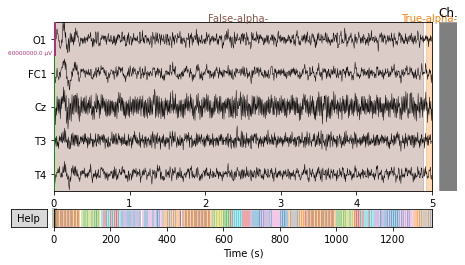

In [7]:
#display raw data

chns = data.info.ch_names

picks= ["O1", "FC1", "Cz", "T3", "T4"]

chn_idxs = [chns.index(chn) for chn in picks]

# data_sample = data.copy()
# data_sample.crop(tmax=5)
f = data.plot(scalings={'eeg': 30}, order=chn_idxs, n_channels=5, duration=5, event_color={-1:'w'})
f.savefig('1_sample_data.png', dpi=300)

### Display Alpha-Waves on a Spectrogram

In [8]:
epoch_type = "alpha"

f1, f2 = mdp.get_epochs(epoch_type, data, nperseg=2000, noverlap=1000, channels=['O1', 'O2'])

Used Annotations descriptions: ['False-alpha-']
29 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Loading data for 29 events and 5001 original time points ...
0 bad epochs dropped
Used Annotations descriptions: ['True-alpha-']
29 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Loading data for 29 events and 5001 original time points ...
0 bad epochs dropped
true_found is: True


## Figure 2 - alpha waves

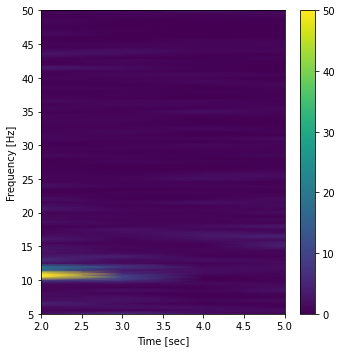

<Figure size 432x288 with 0 Axes>

In [17]:
z = 0
mdp.plot_spectrogram(f2.ts[z], f2.fs[z], f2.specs[z], vmax=50, savefig=True, filename='2_alpha_waves.png')

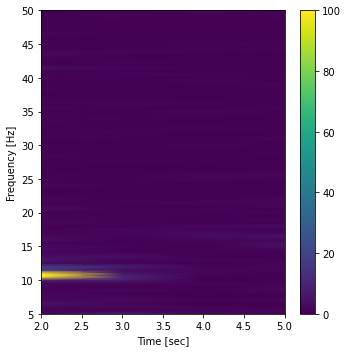

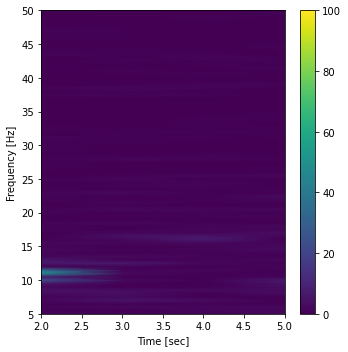

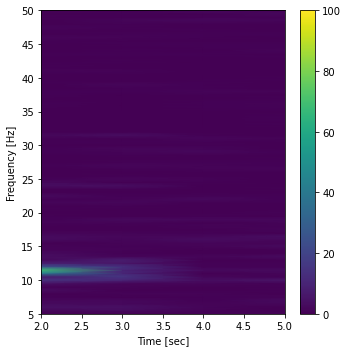

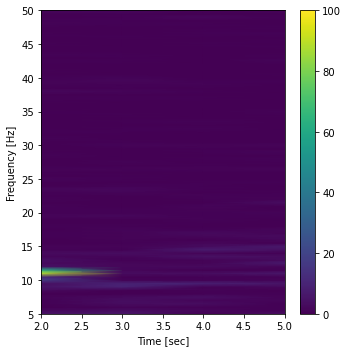

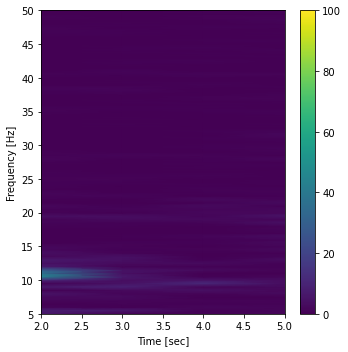

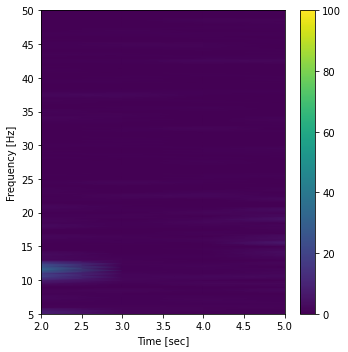

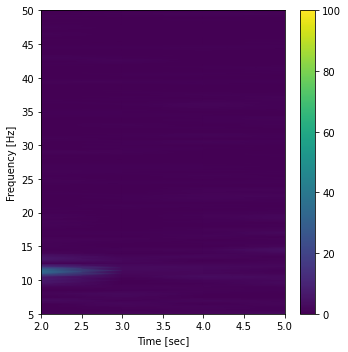

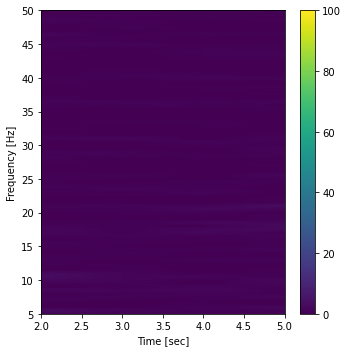

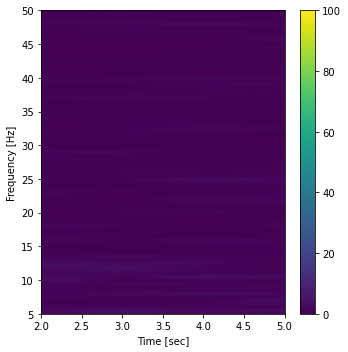

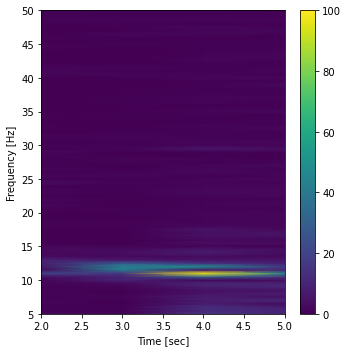

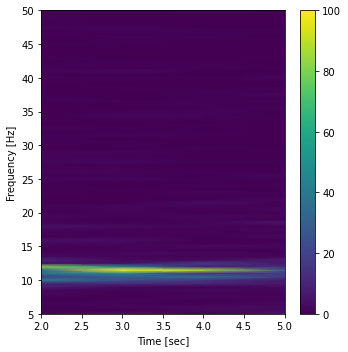

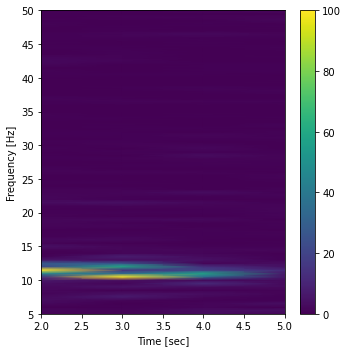

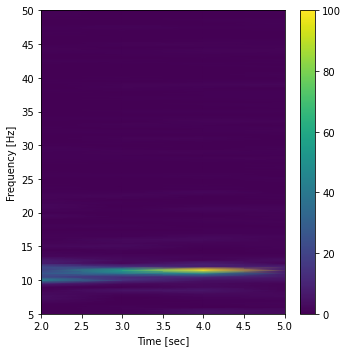

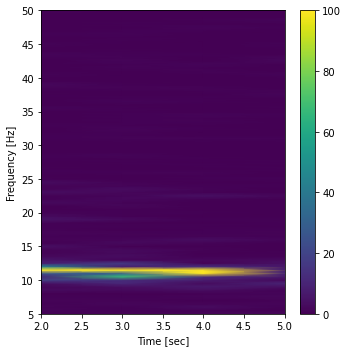

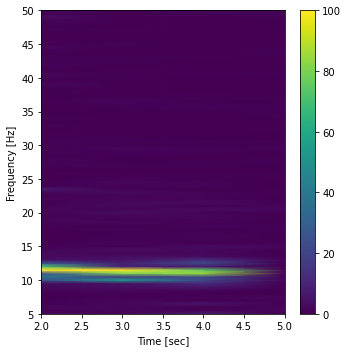

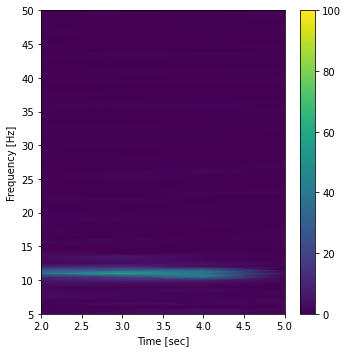

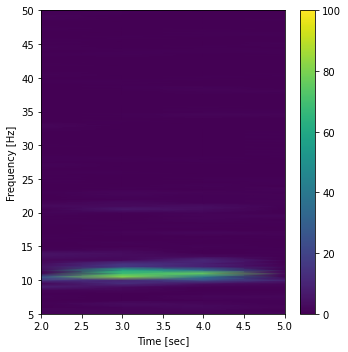

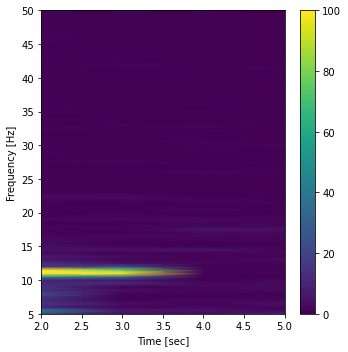

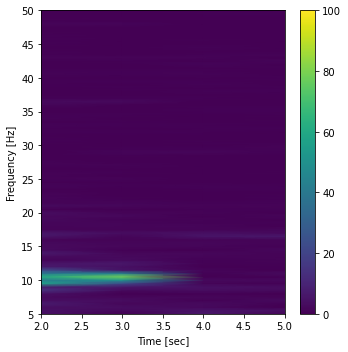

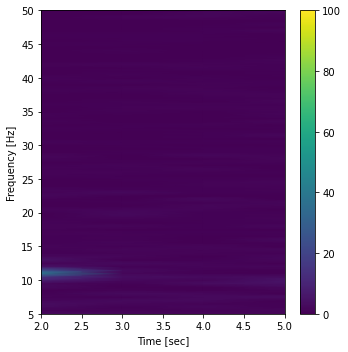

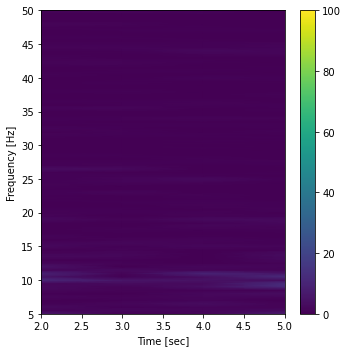

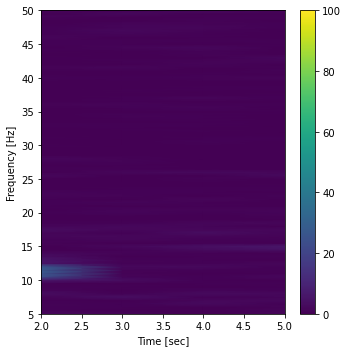

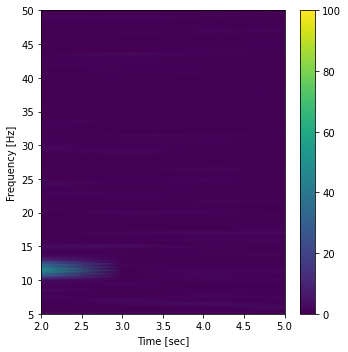

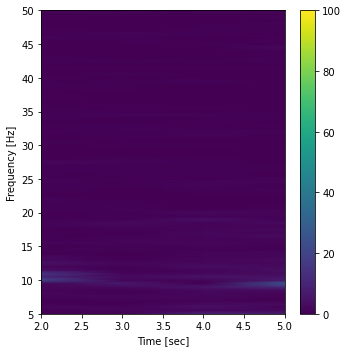

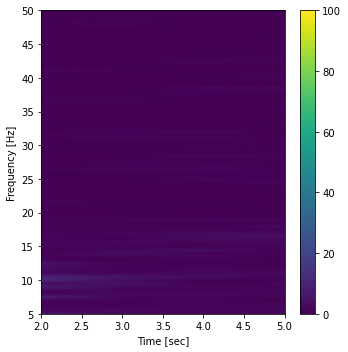

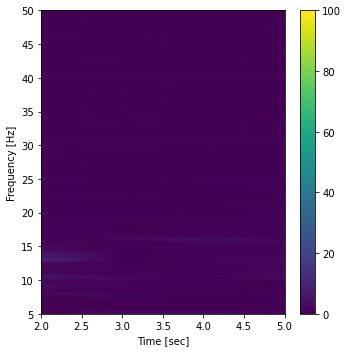

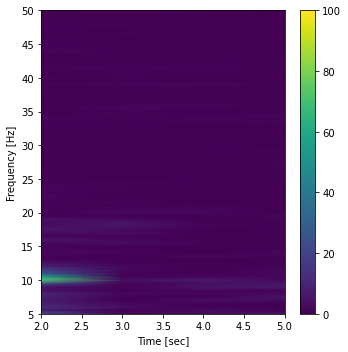

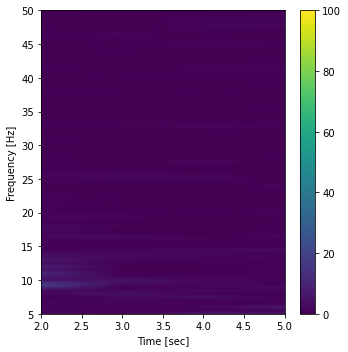

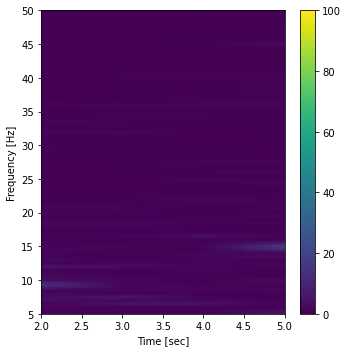

In [10]:
for z in range(len(f2.specs)):
    mdp.plot_spectrogram(f2.ts[z], f2.fs[z], f2.specs[z], vmax=100)

## Load SSVEP
Spectrogram of SSVEP

In [11]:
f1, f2 = mdp.get_epochs('SSVEP', data, nperseg=2000, noverlap=1800, channels=['O1', 'O2'])

Used Annotations descriptions: ['False-SSVEP-']
15 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Loading data for 15 events and 5001 original time points ...
0 bad epochs dropped
Used Annotations descriptions: ['True-SSVEP-']
15 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Loading data for 15 events and 5001 original time points ...
0 bad epochs dropped
true_found is: True


In [12]:
f1.ts[0]

array([2. , 2.2, 2.4, 2.6, 2.8, 3. , 3.2, 3.4, 3.6, 3.8, 4. , 4.2, 4.4,
       4.6, 4.8, 5. ])

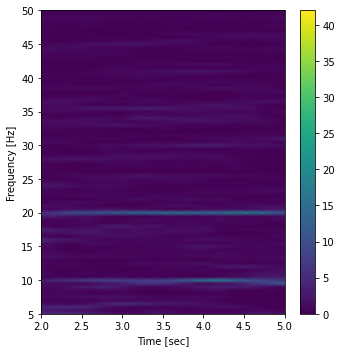

In [13]:
z = 1
# mdp.plot_spectrogram(f2.ts[z], f2.fs[z], f2.specs[z], vmax=20)
mdp.plot_spectrogram(f1.ts[z], f1.fs[z], f1.specs[z])#, vmax=100)

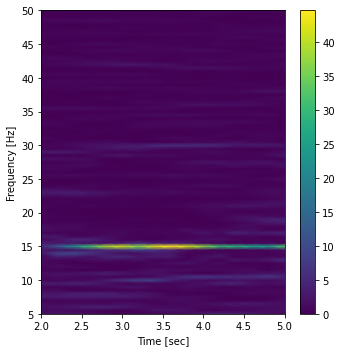

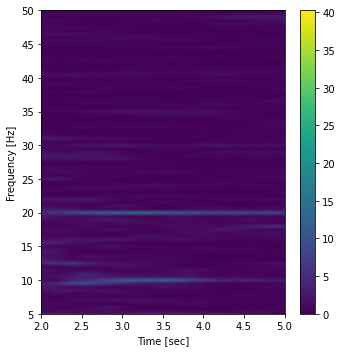

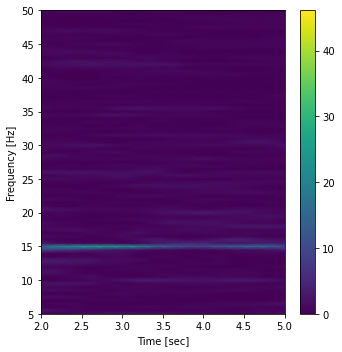

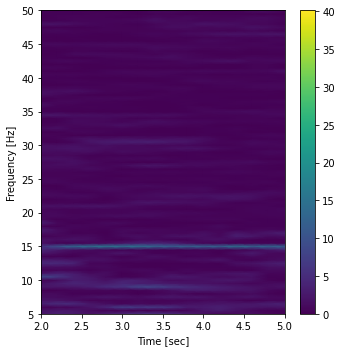

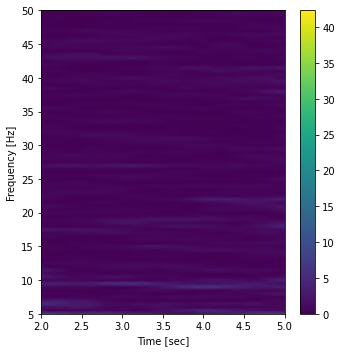

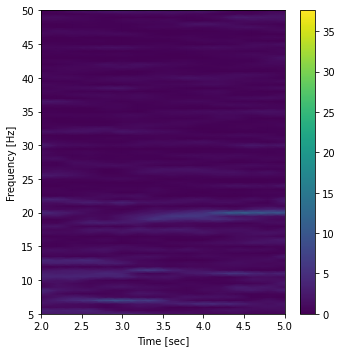

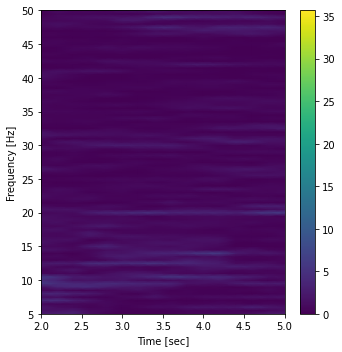

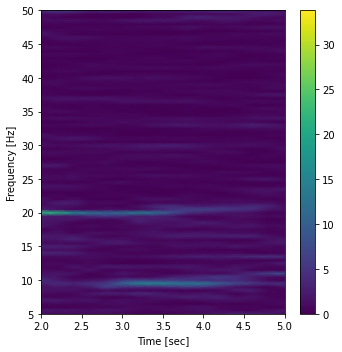

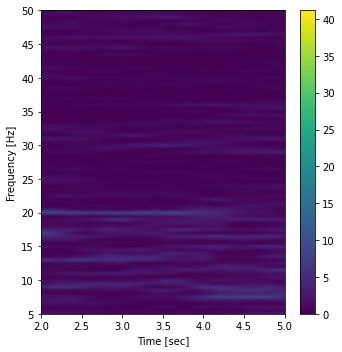

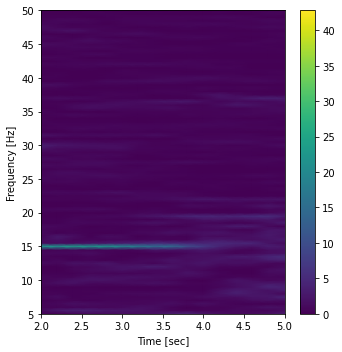

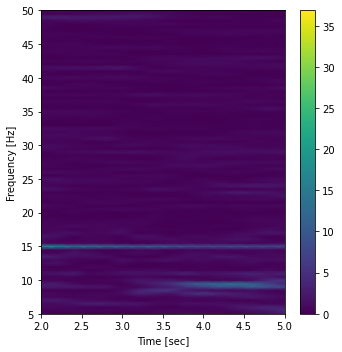

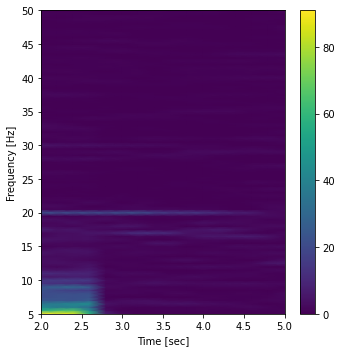

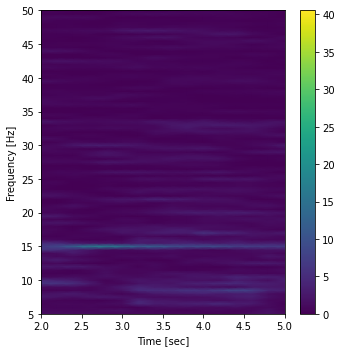

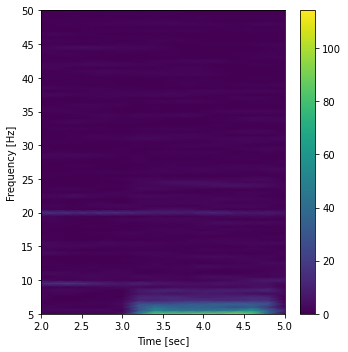

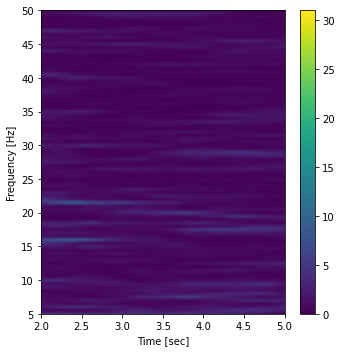

In [14]:
for z in range(len(f2.specs)):
    mdp.plot_spectrogram(f2.ts[z], f2.fs[z], f2.specs[z])

In [15]:
f1.ts[z]

array([2. , 2.2, 2.4, 2.6, 2.8, 3. , 3.2, 3.4, 3.6, 3.8, 4. , 4.2, 4.4,
       4.6, 4.8, 5. ])

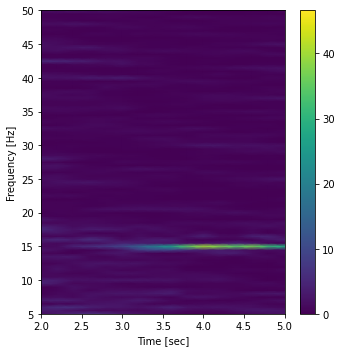

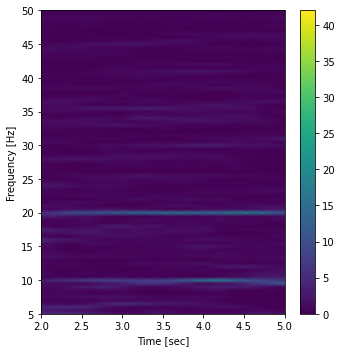

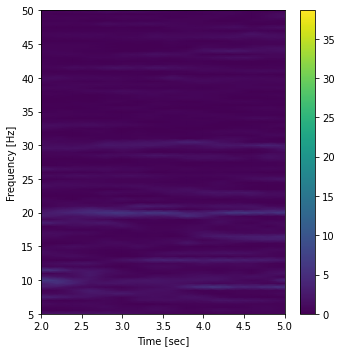

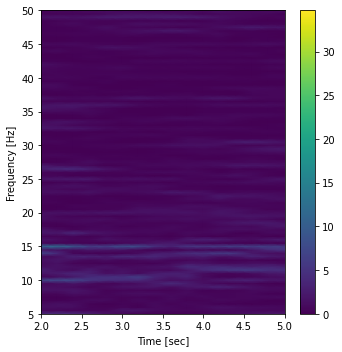

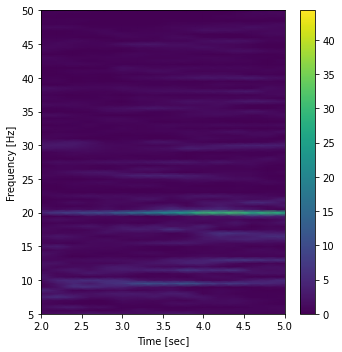

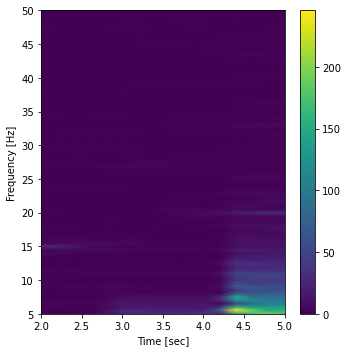

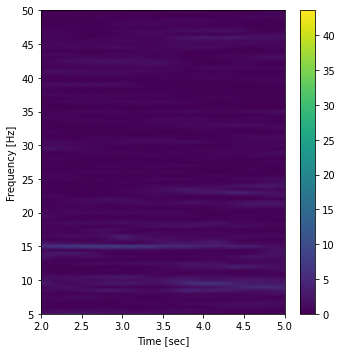

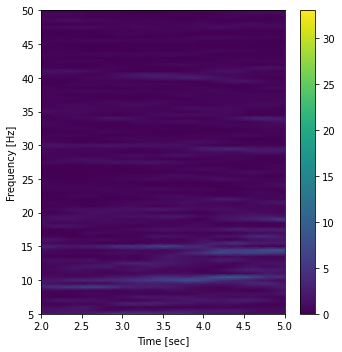

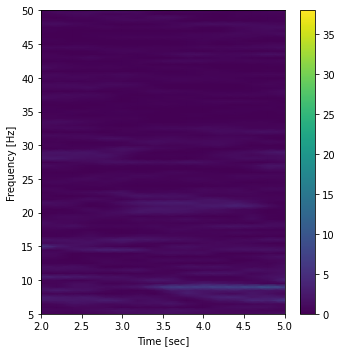

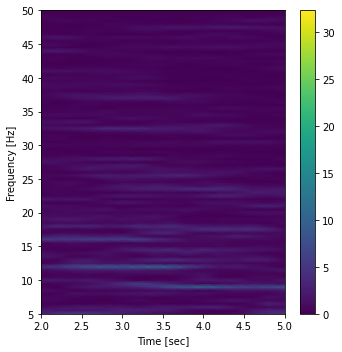

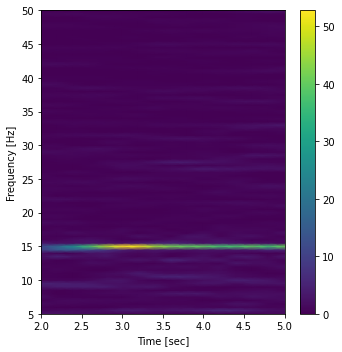

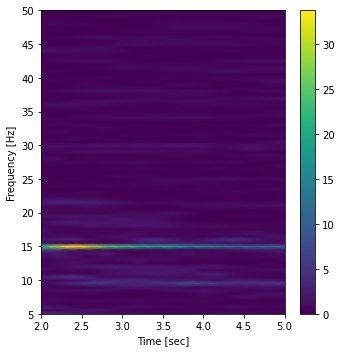

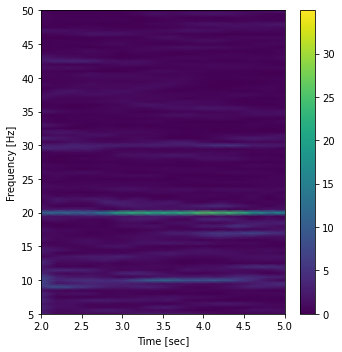

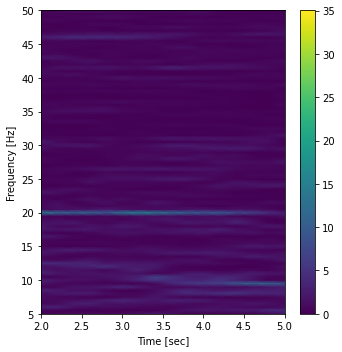

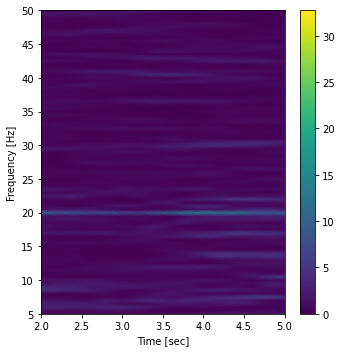

In [16]:
for z in range(len(f1.specs)):
    mdp.plot_spectrogram(f1.ts[z], f1.fs[z], f1.specs[z])

## Figure 3
2 examples of good SSVEP data on top, 2 examples of bad data on bottom

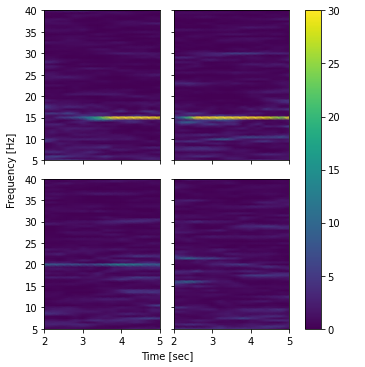

In [17]:
import numpy as np

vmax = 30
ylim = [5, 40]
f, ax = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(5.5, 5.5))
# can use this with ax0.set_xlabel() to set a global x label with older matplotlib
ax0 = f.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)

idx = 0
pcm = ax[0][0].pcolormesh(f1.ts[idx], f1.fs[idx], f1.specs[idx], shading='gouraud', vmax=vmax)
ax[0][0].set_ylim(ylim)

ax[0][1].pcolormesh(f2.ts[idx], f2.fs[idx], f2.specs[idx], shading='gouraud', vmax=vmax)
ax[0][1].set_ylim(ylim)

idx = -1
ax[1][0].pcolormesh(f1.ts[idx], f1.fs[idx], f1.specs[idx], shading='gouraud', vmax=vmax)
ax[1][0].set_ylim(ylim)


ax[1][1].pcolormesh(f2.ts[idx], f2.fs[idx], f2.specs[idx], shading='gouraud', vmax=vmax)
ax[1][1].set_ylim(ylim)


ax0.set_ylabel('Frequency [Hz]', x=0.4)
ax0.set_xlabel('Time [sec]', x=0.4)
plt.tight_layout()
# f.supylabel('Frequency [Hz]')
# f.supxlabel('Time [sec]', x=0.45)
f.colorbar(pcm, ax=ax)

plt.savefig('3_SSVEP_spectrograms.png', dpi=300, facecolor='w')

## Figure 4
spectrograms of motor imagery, maybe similar to https://web.media.mit.edu/~cvx/sht.htm

## Figure 5
maybe similar with laryngeal https://web.media.mit.edu/~cvx/sht.htm

# other

2 other figures with the CSP results for MI and LI